#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Ingest Data

In [2]:
data_credit = 'https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/chapter-06-trees/CreditScoring.csv'

In [3]:
!wget $data_credit

--2023-10-15 20:20:33--  https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/chapter-06-trees/CreditScoring.csv
Resolving github.com (github.com)... 20.207.73.82
Connecting to github.com (github.com)|20.207.73.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 321999 (314K) [text/plain]
Saving to: ‘CreditScoring.csv.1’

CreditScoring.csv.1 100%[===================>] 314.45K   789KB/s    in 0.4s    

2023-10-15 20:20:34 (789 KB/s) - ‘CreditScoring.csv.1’ saved [321999/321999]



In [4]:
!head CreditScoring.csv

"Status","Seniority","Home","Time","Age","Marital","Records","Job","Expenses","Income","Assets","Debt","Amount","Price"
1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
1,0,1,36,26,1,1,1,46,107,0,0,310,910
1,1,2,60,36,2,1,1,75,214,3500,0,650,1645
1,29,2,60,44,2,1,1,75,125,10000,0,1600,1800
1,9,5,12,27,1,1,1,35,80,0,0,200,1093
1,0,2,60,32,2,1,3,90,107,15000,0,1200,1957


In [5]:
df = pd.read_csv('CreditScoring.csv')

In [6]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


#### Lowercase Column Names

In [7]:
df.columns = df.columns.str.lower()

In [8]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


#### Data Preparation

##### Categorical Features

levels(dd$Status) = c("good", "bad")

levels(dd$Home) = c("rent", "owner", "priv", "ignore", "parents", "other")

levels(dd$Marital) = c("single", "married", "widow", "separated", "divorced")

levels(dd$Records) = c("no_rec", "yes_rec")

levels(dd$Job) = c("fixed", "partime", "freelance", "others")

In [9]:
df.status.value_counts()

1    3200
2    1254
0       1
Name: status, dtype: int64

In [10]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [11]:
df.home.value_counts()

2    2107
1     973
5     783
6     319
3     247
4      20
0       6
Name: home, dtype: int64

In [12]:
# Map Home Values to Text Data

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'others',
    0: 'unk'
}

df.home = df.home.map(home_values)

In [13]:
# Map Marital Values to Text Data

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

In [14]:
# Map Records

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

In [15]:
# Map Job

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [16]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


##### Numerical Features

In [17]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [18]:
df['income'].replace(to_replace=99999999.0, value=np.nan).max()

959.0

In [19]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999.0, value=np.nan)

In [20]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


Previously, we found one 'unk' obs in Status. We remove the entry from the dataframe

In [21]:
df = df[df.status != 'unk']

In [22]:
df.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

#### Data Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [25]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [26]:
y_train = (df_train.status == 'default').astype(int).values
y_val = (df_val.status == 'default').astype(int).values
y_test = (df_test.status == 'default').astype(int).values

In [27]:
del df_train['status']
del df_val['status']
del df_test['status']

In [28]:
len(df_train), len(df_val), len(df_test)

(2672, 891, 891)

In [29]:
len(y_train), len(y_test), len(y_test)

(2672, 891, 891)

#### Decision Trees

In [30]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        return 'default'

In [31]:
xi = df_train.iloc[0].to_dict()

In [32]:
assess_risk(xi)

'ok'

##### Using Sklearn

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction import DictVectorizer

In [34]:
train_dict = df_train.fillna(0).to_dict(orient='records')
val_dict = df_val.fillna(0).to_dict(orient='records')

In [35]:
dv = DictVectorizer(sparse=False)

In [36]:
X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)

Default Decision Tree with unlimited Depth

In [37]:
dt = DecisionTreeClassifier()

In [38]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
y_pred = dt.predict_proba(X_train)[:,1]
auc = roc_auc_score(y_train, y_pred)
print(f"Train auc: {auc}")

y_pred = dt.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val, y_pred)
print(f"Val auc: {auc}")

Train auc: 1.0
Val auc: 0.652630113099707


Decision Tree with Restricted Depth using 'max_depth'

In [40]:
dt = DecisionTreeClassifier(max_depth=3)

In [41]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [42]:
y_pred = dt.predict_proba(X_train)[:,1]
auc = roc_auc_score(y_train, y_pred)
print(f"Train auc: {auc}")

y_pred = dt.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val, y_pred)
print(f"Val auc: {auc}")

Train auc: 0.7761016984958594
Val auc: 0.7389079944782155


##### Visualize the tree

In [43]:
from sklearn.tree import export_text, export_graphviz

In [44]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 103.50
|   |   |   |--- class: 1
|   |   |--- income >  103.50
|   |   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- class: 0
|   |   |--- income >  74.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- assets <= 8750.00
|   |   |   |--- class: 1
|   |   |--- assets >  8750.00
|   |   |   |--- class: 0



/home/abhijit/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [45]:
from sklearn.tree import plot_tree

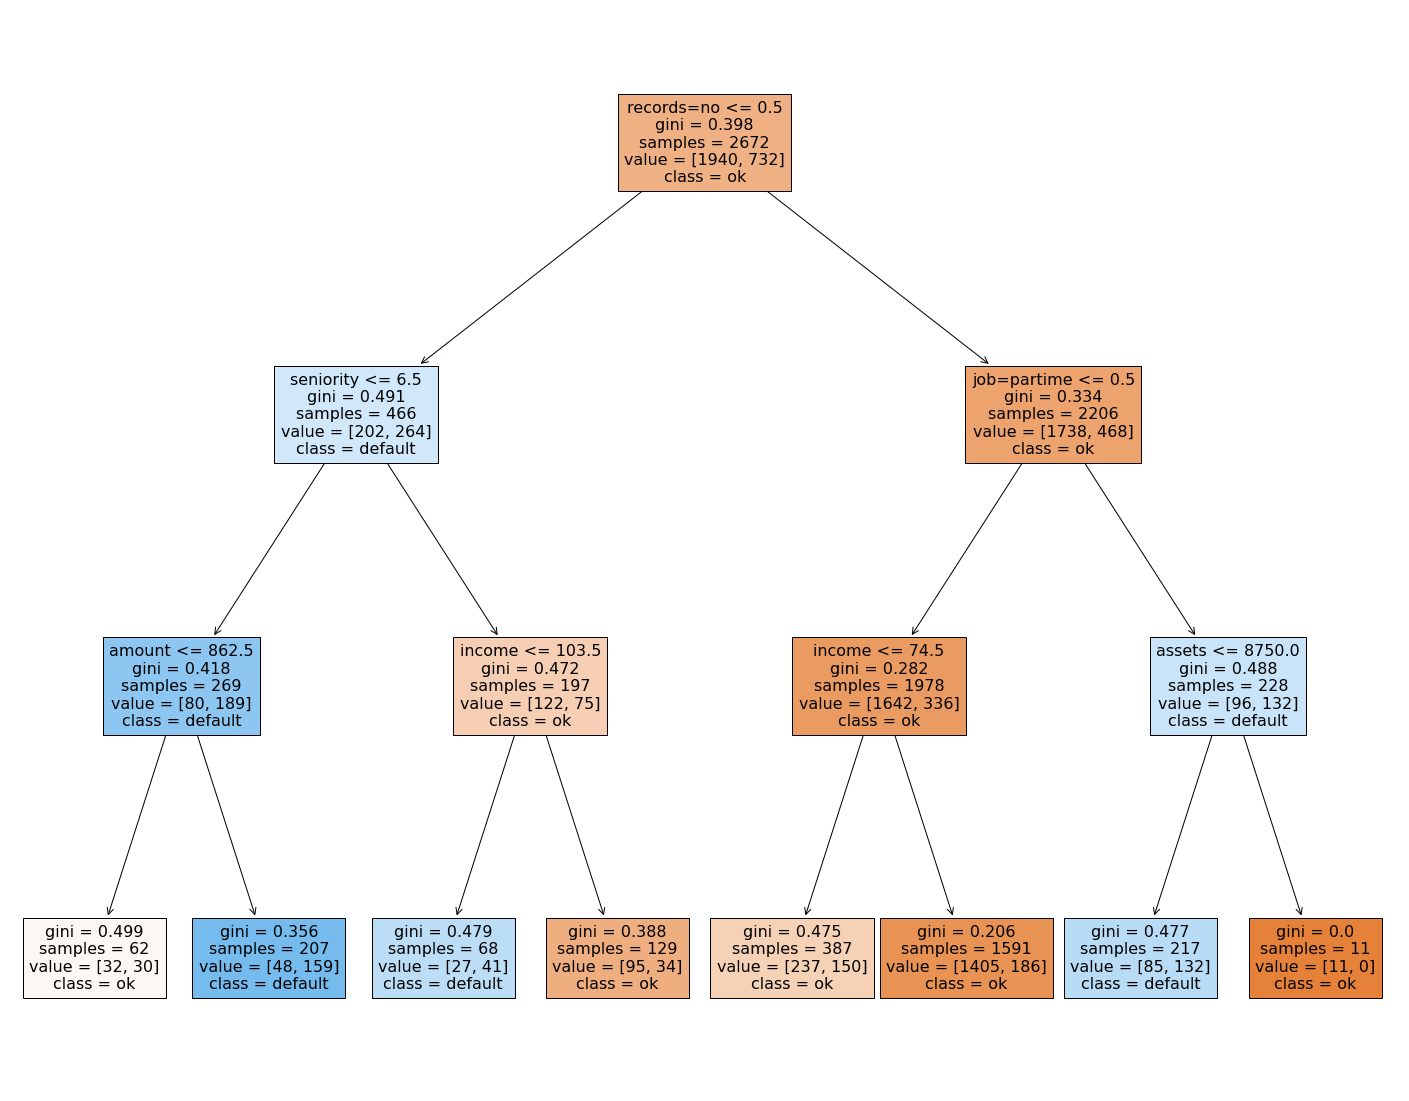

In [46]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(dt, 
              feature_names=dv.get_feature_names(), 
              class_names = df_full_train.status.unique(),
              filled=True)

#### Decision Tree Algorithm

In [66]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns = ['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [67]:
df_example = df_example.sort_values('assets').reset_index(drop=True)
df_example

,assets,debt,status
0,0,1000,default
1,2000,1000,default
2,3000,2000,default
3,4000,1000,ok
4,5000,1000,ok
5,5000,1000,ok
6,8000,3000,default
7,9000,500,ok


In [69]:
from IPython.display import display

In [70]:
observations = []

for t in [0, 2000, 3000, 4000, 5000, 8000]:
    df_left = df_example[df_example.assets <= t]
    df_right = df_example[df_example.assets > t]
    
    print(t)
    display(df_left)
    display(df_right)
    print()
    
    mis_rate_left = (df_left.status == 'ok').sum()/len(df_left)
#     display(mis_rate_left)
    mis_rate_right = (df_right.status == 'default').sum()/len(df_right)
#     display(mis_rate_right)
    
    avg_rate = (mis_rate_left + mis_rate_right)/2
    
    observations.append([t, 'default', round(mis_rate_left*100), 'ok', round(mis_rate_right*100), round(avg_rate*100)])
    
df_impurity = pd.DataFrame(observations, columns = ['assets_threshold', 
                                                   'left_split_pred',
                                                   'left_split_impurity', 
                                                   'right_split_pred', 
                                                   'right_split_impurity',
                                                   'average_impurity'])

0


,assets,debt,status
0,0,1000,default


,assets,debt,status
1,2000,1000,default
2,3000,2000,default
3,4000,1000,ok
4,5000,1000,ok
5,5000,1000,ok
6,8000,3000,default
7,9000,500,ok



2000


,assets,debt,status
0,0,1000,default
1,2000,1000,default


,assets,debt,status
2,3000,2000,default
3,4000,1000,ok
4,5000,1000,ok
5,5000,1000,ok
6,8000,3000,default
7,9000,500,ok



3000


,assets,debt,status
0,0,1000,default
1,2000,1000,default
2,3000,2000,default


,assets,debt,status
3,4000,1000,ok
4,5000,1000,ok
5,5000,1000,ok
6,8000,3000,default
7,9000,500,ok



4000


,assets,debt,status
0,0,1000,default
1,2000,1000,default
2,3000,2000,default
3,4000,1000,ok


,assets,debt,status
4,5000,1000,ok
5,5000,1000,ok
6,8000,3000,default
7,9000,500,ok



5000


,assets,debt,status
0,0,1000,default
1,2000,1000,default
2,3000,2000,default
3,4000,1000,ok
4,5000,1000,ok
5,5000,1000,ok


,assets,debt,status
6,8000,3000,default
7,9000,500,ok



8000


,assets,debt,status
0,0,1000,default
1,2000,1000,default
2,3000,2000,default
3,4000,1000,ok
4,5000,1000,ok
5,5000,1000,ok
6,8000,3000,default


,assets,debt,status
7,9000,500,ok


In [71]:
df_impurity

,assets_threshold,left_split_pred,left_split_impurity,right_split_pred,right_split_impurity,average_impurity
0,0,default,0,ok,43,21
1,2000,default,0,ok,33,17
2,3000,default,0,ok,20,10
3,4000,default,25,ok,25,25
4,5000,default,50,ok,50,50
5,8000,default,43,ok,0,21


In [72]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000],
}

In [79]:
for feature, Ts in thresholds.items():
    print("#"*40)
    print(feature)
    
    observations = []

    for t in Ts:
        if feature == 'assets':
            df_left = df_example[df_example[feature] <= t]
            df_right = df_example[df_example[feature] > t]
        else:
            df_left = df_example[df_example[feature] > t]
            df_right = df_example[df_example[feature] <= t]

        print(f"Threshold={t}")
        display(df_left)
        print(df_left['status'].value_counts(normalize=True))
        display(df_right)
        print(df_right['status'].value_counts(normalize=True))

        mis_rate_left = (df_left.status == 'ok').sum()/len(df_left)
    #     display(mis_rate_left)
        mis_rate_right = (df_right.status == 'default').sum()/len(df_right)
    #     display(mis_rate_right)

        avg_rate = (mis_rate_left + mis_rate_right)/2
        if feature == 'assets':
            observations.append([t, 'default', round(mis_rate_left*100), 'ok', round(mis_rate_right*100), round(avg_rate*100)])
        else:
            observations.append([t, 'default', round(mis_rate_right*100), 'ok', round(mis_rate_left*100), round(avg_rate*100)])
        
    df_impurity = pd.DataFrame(observations, columns = ['threshold', 
                                                       'left_split_pred',
                                                       'left_split_impurity', 
                                                       'right_split_pred', 
                                                       'right_split_impurity',
                                                       'average_impurity'])
    display(df_impurity)
    print("#"*40)

########################################
assets
Threshold=0


,assets,debt,status
0,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
1,2000,1000,default
2,3000,2000,default
3,4000,1000,ok
4,5000,1000,ok
5,5000,1000,ok
6,8000,3000,default
7,9000,500,ok


ok         0.571429
default    0.428571
Name: status, dtype: float64
Threshold=2000


,assets,debt,status
0,0,1000,default
1,2000,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
2,3000,2000,default
3,4000,1000,ok
4,5000,1000,ok
5,5000,1000,ok
6,8000,3000,default
7,9000,500,ok


ok         0.666667
default    0.333333
Name: status, dtype: float64
Threshold=3000


,assets,debt,status
0,0,1000,default
1,2000,1000,default
2,3000,2000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
3,4000,1000,ok
4,5000,1000,ok
5,5000,1000,ok
6,8000,3000,default
7,9000,500,ok


ok         0.8
default    0.2
Name: status, dtype: float64
Threshold=4000


,assets,debt,status
0,0,1000,default
1,2000,1000,default
2,3000,2000,default
3,4000,1000,ok


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,debt,status
4,5000,1000,ok
5,5000,1000,ok
6,8000,3000,default
7,9000,500,ok


ok         0.75
default    0.25
Name: status, dtype: float64
Threshold=5000


,assets,debt,status
0,0,1000,default
1,2000,1000,default
2,3000,2000,default
3,4000,1000,ok
4,5000,1000,ok
5,5000,1000,ok


default    0.5
ok         0.5
Name: status, dtype: float64


,assets,debt,status
6,8000,3000,default
7,9000,500,ok


default    0.5
ok         0.5
Name: status, dtype: float64
Threshold=8000


,assets,debt,status
0,0,1000,default
1,2000,1000,default
2,3000,2000,default
3,4000,1000,ok
4,5000,1000,ok
5,5000,1000,ok
6,8000,3000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64


,assets,debt,status
7,9000,500,ok


ok    1.0
Name: status, dtype: float64


,threshold,left_split_pred,left_split_impurity,right_split_pred,right_split_impurity,average_impurity
0,0,default,0,ok,43,21
1,2000,default,0,ok,33,17
2,3000,default,0,ok,20,10
3,4000,default,25,ok,25,25
4,5000,default,50,ok,50,50
5,8000,default,43,ok,0,21


########################################
########################################
debt
Threshold=500


,assets,debt,status
0,0,1000,default
1,2000,1000,default
2,3000,2000,default
3,4000,1000,ok
4,5000,1000,ok
5,5000,1000,ok
6,8000,3000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64


,assets,debt,status
7,9000,500,ok


ok    1.0
Name: status, dtype: float64
Threshold=1000


,assets,debt,status
2,3000,2000,default
6,8000,3000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,0,1000,default
1,2000,1000,default
3,4000,1000,ok
4,5000,1000,ok
5,5000,1000,ok
7,9000,500,ok


ok         0.666667
default    0.333333
Name: status, dtype: float64
Threshold=2000


,assets,debt,status
6,8000,3000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,0,1000,default
1,2000,1000,default
2,3000,2000,default
3,4000,1000,ok
4,5000,1000,ok
5,5000,1000,ok
7,9000,500,ok


ok         0.571429
default    0.428571
Name: status, dtype: float64


,threshold,left_split_pred,left_split_impurity,right_split_pred,right_split_impurity,average_impurity
0,500,default,0,ok,43,21
1,1000,default,33,ok,0,17
2,2000,default,43,ok,0,21


########################################


#### Hyperparamter Tuning for Decision Trees

In [80]:
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    print("%4s -> %.3f" % (d, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.767
   6 -> 0.748
  10 -> 0.699
  15 -> 0.673
  20 -> 0.653
None -> 0.639


In [91]:
for m in [1, 5, 10, 15, 20, 50, 100, 200]:
    dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=m)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%3s -> %.3f' % (m, auc))

  1 -> 0.761
  5 -> 0.761
 10 -> 0.761
 15 -> 0.764
 20 -> 0.761
 50 -> 0.753
100 -> 0.756
200 -> 0.747


In [83]:
scores = []

for m in [4, 5, 6]:

    for s in [1, 5, 10, 15, 20, 50, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=m, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((m, s, auc))

In [87]:
df_scores = pd.DataFrame(scores, columns = ['max_depth', 
                                            'min_sample_leaf',
                                            'auc'])
df_scores.sort_values('auc', ascending=False).head()

,max_depth,min_sample_leaf,auc
19,6,15,0.785474
18,6,10,0.777803
22,6,100,0.776434
12,5,20,0.774028
20,6,20,0.773982


In [89]:
df_scores_pivot = df_scores.pivot(index='min_sample_leaf',
                                  columns = 'max_depth',
                                  values = 'auc')
df_scores_pivot

max_depth,4,5,6
min_sample_leaf,,,
1,0.761283,0.766496,0.749564
5,0.761283,0.768173,0.762212
10,0.761283,0.761809,0.777803
15,0.763726,0.772142,0.785474
20,0.760910,0.774028,0.773982
50,0.753457,0.768197,0.771733
100,0.755937,0.763384,0.776434
200,0.747260,0.759073,0.768267


<AxesSubplot:xlabel='max_depth', ylabel='min_sample_leaf'>

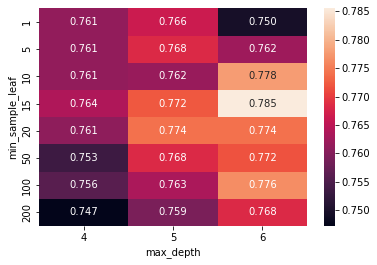

In [90]:
sns.heatmap(df_scores_pivot, annot=True, fmt = '.3f')

#### Ensemble Algorithms